# Exercise 6.2 - Exploring Relationships - Human Trafficking - FBI Data

## This Script contains the follwong:

### A. Import Libraries and Data

### B. Data Cleaning

### C. Answer Task Questions

## A. Import Libraries and Data

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Set path
path = r'C:\Users\asus\Human Trafficking Project Achievement 6'

In [4]:
# import dataframe

df = pd.read_csv(os.path.join(path, '02 Data', '02 Cleaned Data', 'FBI files CLEANED.csv'), index_col = False)

In [5]:
df.shape

(3894, 11)

In [6]:
df.columns

Index(['DATA_YEAR', 'AGENCY_TYPE_NAME', 'STATE_ABBR', 'STATE_NAME',
       'COUNTY_NAME', 'REGION_NAME', 'POPULATION_GROUP_CODE',
       'POPULATION_GROUP_DESC', 'HUMAN_TRAFFICKING', 'OFFENSE_SUBCAT_NAME',
       'ACTUAL_COUNT'],
      dtype='object')

## B. Data Cleaning FBI df dataframe

In [7]:
df.head()

,DATA_YEAR,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,COUNTY_NAME,REGION_NAME,POPULATION_GROUP_CODE,POPULATION_GROUP_DESC,HUMAN_TRAFFICKING,OFFENSE_SUBCAT_NAME,ACTUAL_COUNT
0,2013,County,MO,Missouri,ST LOUIS,Midwest,9A,"MSA counties 100,000 or over",1,Commercial Sex Acts,6
1,2013,County,OH,Ohio,ALLEN,Midwest,9C,"MSA counties from 10,000 thru 24,999",1,Commercial Sex Acts,1
2,2013,County,OH,Ohio,ALLEN,Midwest,9C,"MSA counties from 10,000 thru 24,999",1,Involuntary Servitude,1
3,2013,City,TN,Tennessee,"HAMBLEN, JEFFERSON",South,4,"Cities from 25,000 thru 49,999",1,Commercial Sex Acts,1
4,2013,City,TN,Tennessee,SHELBY,South,1B,"Cities from 500,000 thru 999,999",1,Commercial Sex Acts,3


In [8]:
# rename columns for shorter, clearer names
df.rename(columns = {'DATA_YEAR' : 'Year', 'AGENCY_TYPE_NAME' : 'Agency Type', 'POPULATION_GROUP_CODE' : 'Pop Code', 'POPULATION_GROUP_DESC' : 'Pop Desc', 'OFFENSE_NAME' : 'Offense', 'OFFENSE_SUBCAT_NAME' : 'Offense Subcat', 'ACTUAL_COUNT' : 'Offense Count' }, inplace = True)

In [9]:
df.head()

,Year,Agency Type,STATE_ABBR,STATE_NAME,COUNTY_NAME,REGION_NAME,Pop Code,Pop Desc,HUMAN_TRAFFICKING,Offense Subcat,Offense Count
0,2013,County,MO,Missouri,ST LOUIS,Midwest,9A,"MSA counties 100,000 or over",1,Commercial Sex Acts,6
1,2013,County,OH,Ohio,ALLEN,Midwest,9C,"MSA counties from 10,000 thru 24,999",1,Commercial Sex Acts,1
2,2013,County,OH,Ohio,ALLEN,Midwest,9C,"MSA counties from 10,000 thru 24,999",1,Involuntary Servitude,1
3,2013,City,TN,Tennessee,"HAMBLEN, JEFFERSON",South,4,"Cities from 25,000 thru 49,999",1,Commercial Sex Acts,1
4,2013,City,TN,Tennessee,SHELBY,South,1B,"Cities from 500,000 thru 999,999",1,Commercial Sex Acts,3


In [10]:
# create data subset for df dataframe

dfsub = df.drop(['STATE_ABBR', 'COUNTY_NAME', 'REGION_NAME', 'Pop Code', 'Pop Desc' ], axis = 1)

In [11]:
dfsub.head()

,Year,Agency Type,STATE_NAME,HUMAN_TRAFFICKING,Offense Subcat,Offense Count
0,2013,County,Missouri,1,Commercial Sex Acts,6
1,2013,County,Ohio,1,Commercial Sex Acts,1
2,2013,County,Ohio,1,Involuntary Servitude,1
3,2013,City,Tennessee,1,Commercial Sex Acts,1
4,2013,City,Tennessee,1,Commercial Sex Acts,3


In [12]:
dfsub.shape

(3894, 6)

check datatypes

In [13]:
dfsub.dtypes

Year                  int64
Agency Type          object
STATE_NAME           object
HUMAN_TRAFFICKING     int64
Offense Subcat       object
Offense Count         int64
dtype: object

In [15]:
# change data types in dfsub from object to category

dfsub['Agency Type'] = dfsub['Agency Type'].astype('category').cat.codes
dfsub['STATE_NAME'] = dfsub['STATE_NAME'].astype('category').cat.codes
dfsub['Offense Subcat'] = dfsub['Offense Subcat'].astype('category').cat.codes

In [16]:
dfsub.dtypes

Year                 int64
Agency Type           int8
STATE_NAME            int8
HUMAN_TRAFFICKING    int64
Offense Subcat        int8
Offense Count        int64
dtype: object

# C. Answer Task Questions

## 3. Create a Matrix Heatmap for FBI Dataframe

In [17]:
# create a correlation matrix heatmap

dfsub.corr()

,Year,Agency Type,STATE_NAME,HUMAN_TRAFFICKING,Offense Subcat,Offense Count
Year,1.000000,0.061274,-0.015242,NaN,0.014931,-0.047681
Agency Type,0.061274,1.000000,0.064401,NaN,-0.026460,-0.047141
STATE_NAME,-0.015242,0.064401,1.000000,NaN,0.045096,0.037263
HUMAN_TRAFFICKING,NaN,NaN,NaN,NaN,NaN,NaN
Offense Subcat,0.014931,-0.026460,0.045096,NaN,1.000000,-0.064663
Offense Count,-0.047681,-0.047141,0.037263,NaN,-0.064663,1.000000


In [25]:
# change NAN values to 0 for more accurate heatmap 
dfsub['HUMAN_TRAFFICKING'] = dfsub['HUMAN_TRAFFICKING'].fillna(0) 

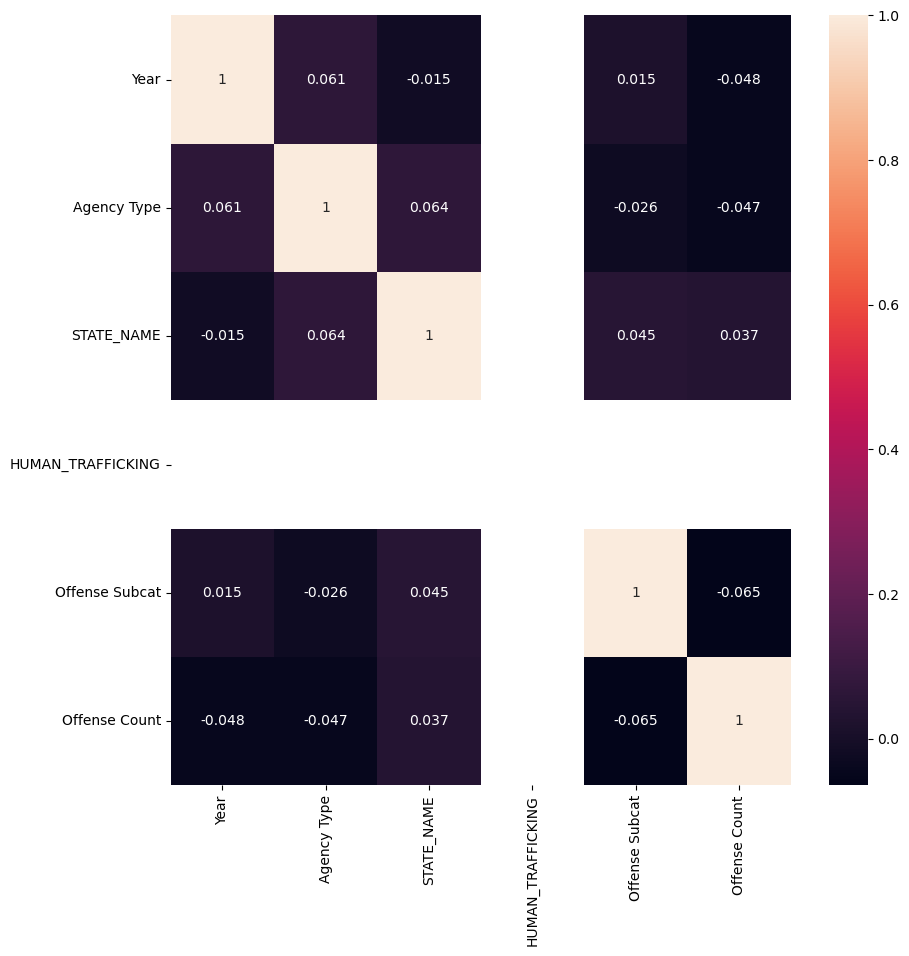

In [26]:
# create a correlation matrix heatmap of dfsub

f,ax = plt.subplots(figsize=(10,10))

corr = sns.heatmap(dfsub.corr(), annot = True, ax = ax)

In [32]:
#Export viz
corr.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'heatmap FBI.png'))

## Question 3 Observations

There are not a lot of strong correlations in this dataframe. There is a rather strong negative correlation between Offense Count and Offense Subcat(egory). 

## 4. Create a Scatterplot or Scatterplots

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


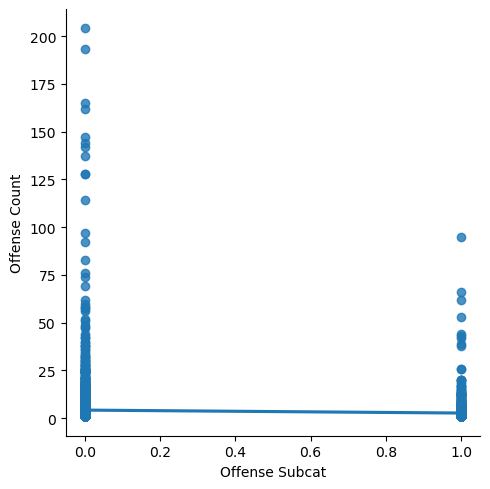

In [30]:
# create scatterplot

sns.lmplot(x = 'Offense Subcat', y = 'Offense Count', data = dfsub)

In [69]:
# check value counts
dfsub['Offense Subcat'].value_counts(dropna = False) 

Offense Subcat
0    2879
1    1015
Name: count, dtype: int64

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


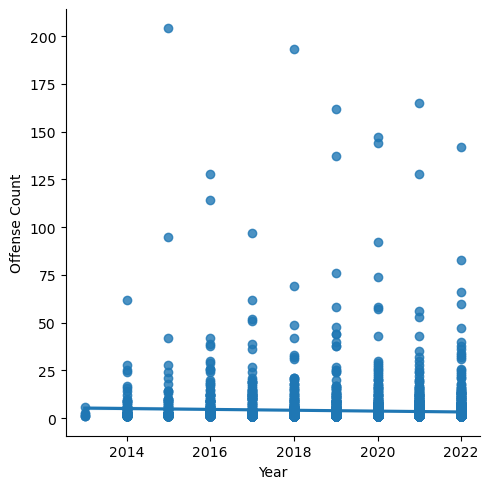

In [29]:
# create scatterplot

sns.lmplot(x = 'Year', y = 'Offense Count', data = dfsub)

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


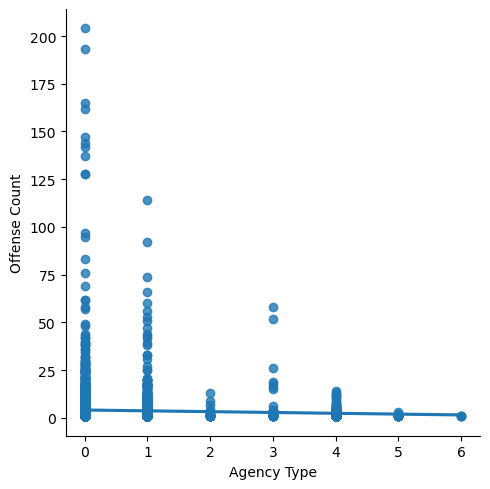

In [31]:
# create scatterplot

sns.lmplot(x = 'Agency Type', y = 'Offense Count', data = dfsub)

## Question 4 Observations:

I did 3 scatterplots with Offense Count as the common denominator. We can clearly see that there are no particularly strong correlations being shown, but some important data shines through. 
1. When compared against the offense Subcatagory, we can see that trafficking for commercial sex acts is much more prevalent than trafficking for Involuntary Servitude, as reported by law enforcement agencies accross the US. 
2. When compared against Year, we can see that trafficking in the US was strongest in 2015 with over 200 trafficking acts committed nationwide, as reported by law enforcement agencies nationwide. 
3. When compared against Agency Type, we can clearly see that most trafficking offenses were caught by City law enforcement agencies, compared to other agency types.


## 5. Creating Pair Plots

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

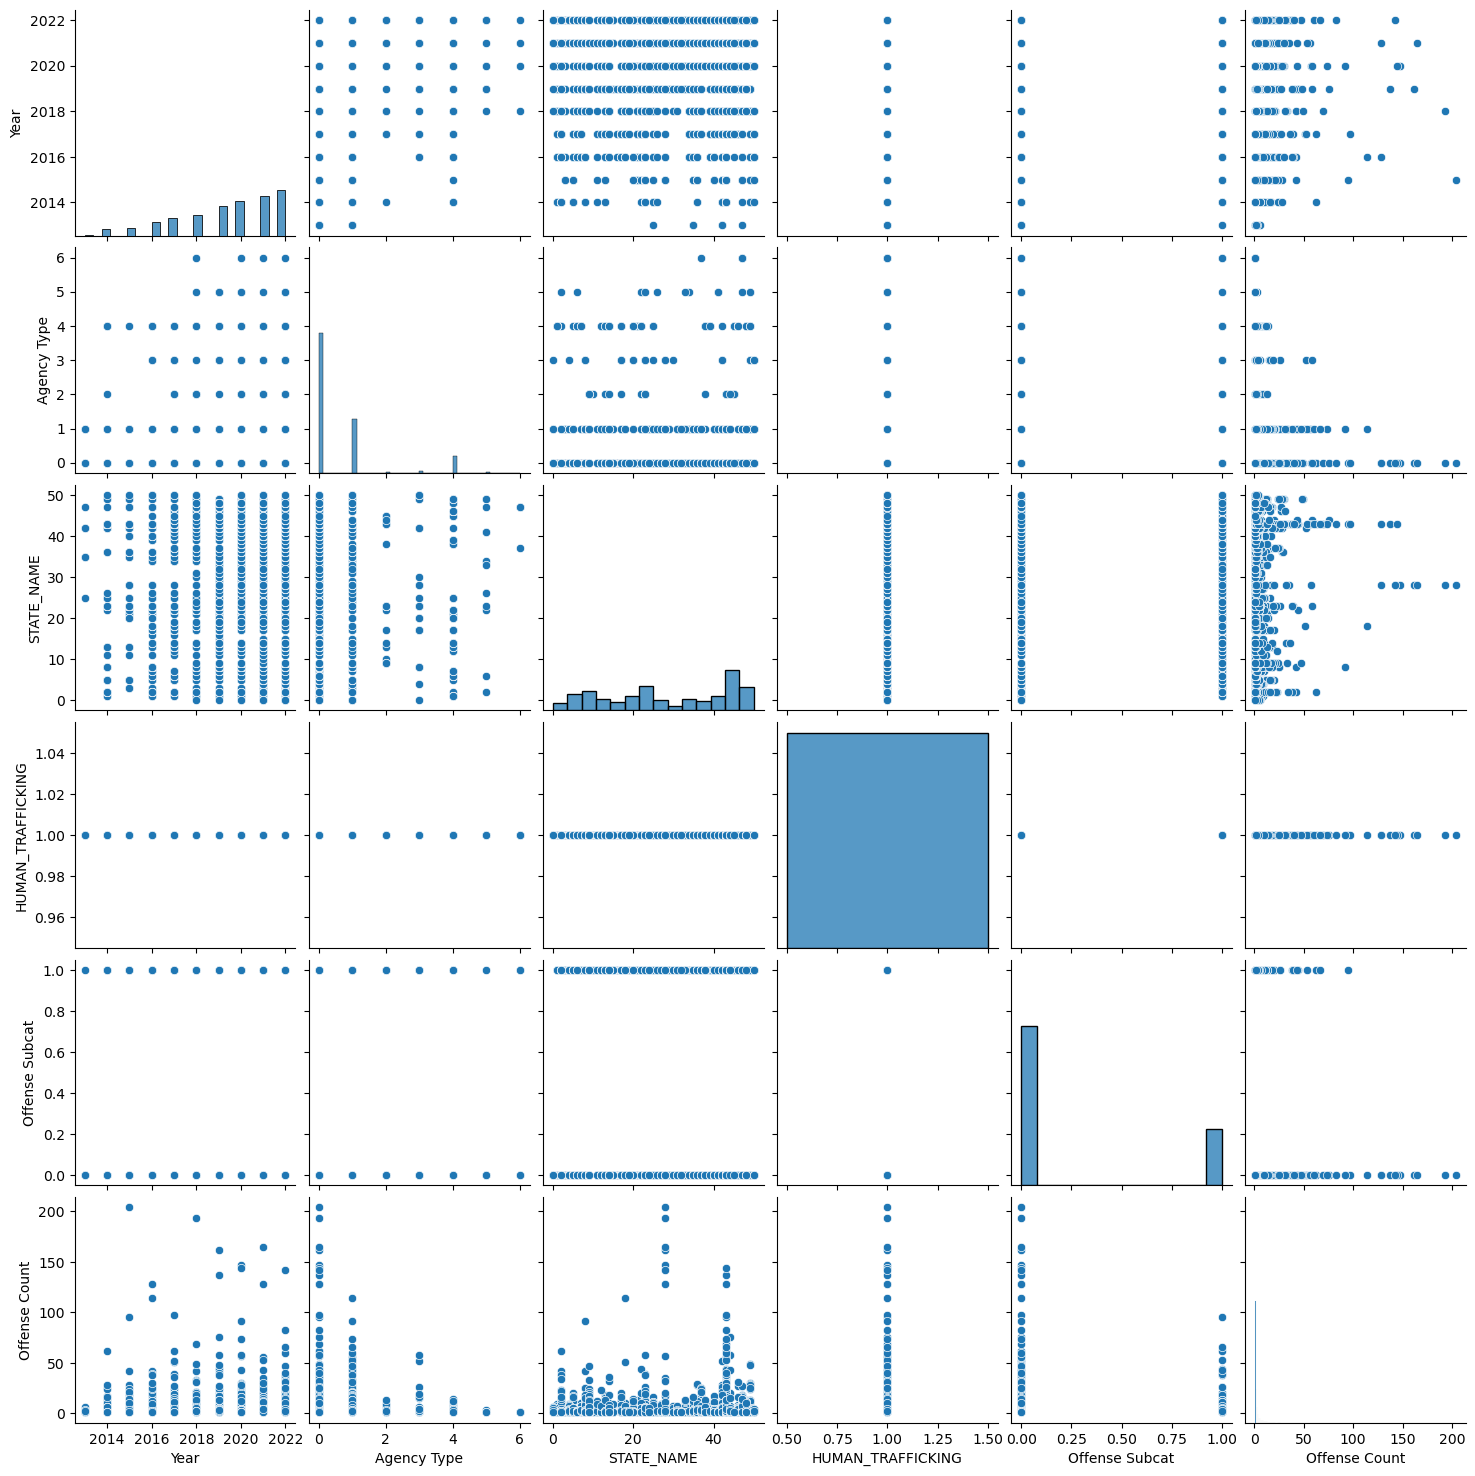

In [33]:
# Creating a pairplot
pair_plot = sns.pairplot(dfsub)

In [34]:
#Export viz
pair_plot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pairplot FBI.png'))

### Question 5 Observations:

We can see that although tehre are no strong correlations, there are some pairings that give us a seemingly clear picture of the situation in the US concerning human trafficking. WE can see which states are most affected, which years have been the busiest, which agencies have had the most arrest activity, and how much activity per year each agency type has had. All in all we get a fairly clear picture of the problem of human trafficking in the US. 

## 6. Creating Categorical Plots

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Agency Type', ylabel='Count'>

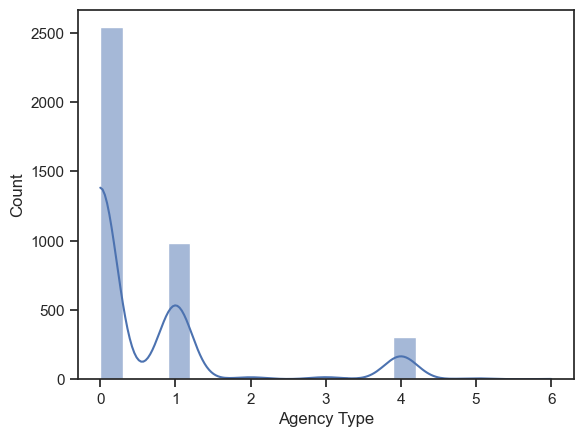

In [49]:
# creating categorical plot

sns.histplot(dfsub['Agency Type'],bins = 20, kde = True)

In [60]:
# create score category for categorical plot
dfsub.loc[dfsub['Agency Type'] == 0, 'Agency'] = 'City'

In [50]:
# create score category for categorical plot
dfsub.loc[dfsub['Agency Type'] == 1, 'Agency'] = 'County'

In [51]:
# create score category for categorical plot
dfsub.loc[dfsub['Agency Type'] == 2, 'Agency'] = 'Other'

In [52]:
# create score category for categorical plot
dfsub.loc[dfsub['Agency Type'] == 3, 'Agency'] = 'State'

In [53]:
# create score category for categorical plot
dfsub.loc[dfsub['Agency Type'] == 4, 'Agency'] = 'State Police'

In [54]:
# create score category for categorical plot
dfsub.loc[dfsub['Agency Type'] == 5, 'Agency'] = 'Tribal'

In [55]:
# create score category for categorical plot
dfsub.loc[dfsub['Agency Type'] == 6, 'Agency'] = 'University/College'

In [56]:
# check value counts
dfsub['Agency Type'].value_counts(dropna = False) 

Agency Type
0    2541
1     980
4     304
3      27
2      26
5      12
6       4
Name: count, dtype: int64

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


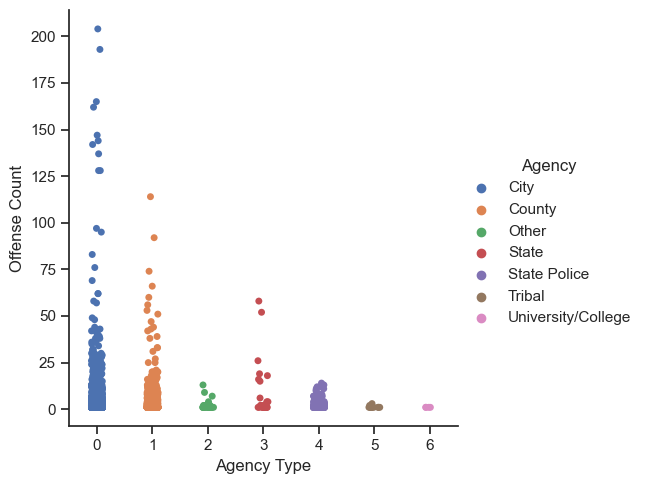

In [61]:
# Creating categorical plot
sns.set(style="ticks")
dfsub_plot = sns.catplot(x='Agency Type', y='Offense Count', hue="Agency", data=dfsub)

In [62]:
#Export visualization

dfsub_plot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Agency_vs_Offense Count.png'))

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


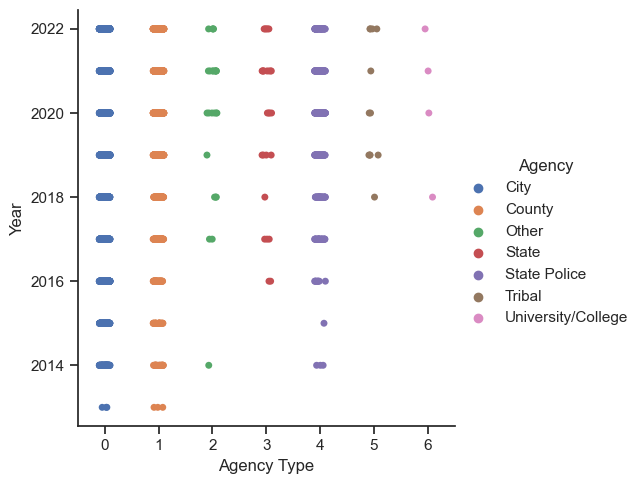

In [63]:
# Creating categorical plot
sns.set(style="ticks")
dfsub_plot = sns.catplot(x='Agency Type', y='Year', hue="Agency", data=dfsub)

In [64]:
#Export visualization

dfsub_plot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Agency_vs_Year.png'))

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


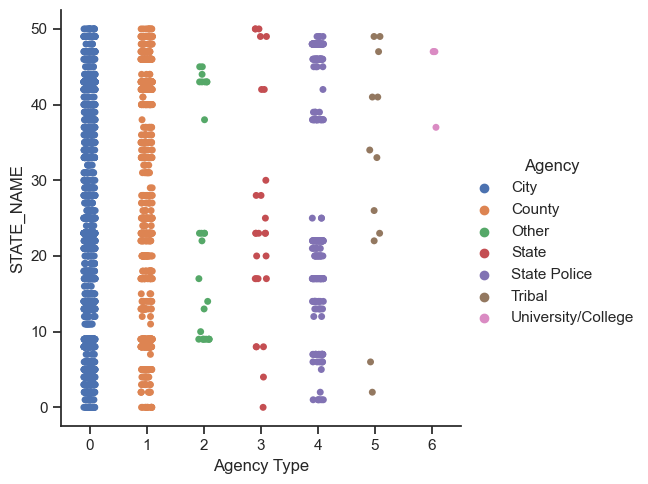

In [67]:
# Creating categorical plot
sns.set(style="ticks")
dfsub_plot = sns.catplot(x='Agency Type', y='STATE_NAME', hue="Agency", data=dfsub)

In [68]:
#Export visualization

dfsub_plot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Agency_vs_State Name.png'))

## Question 6 Observations

There is a clear and direct relation between all the categories and we can see how the data has been distributed among the different categories. ALthough tehre are no strong correlations, there are some solid relations between some of the categories...enough that one can see a cleqr picture of what is being reported in the FBI data.

## 7. Revisiting Generated Questions:

##### How many people are trafficked for slave(manual) labor?  - Combining data found in the csv file and the Jupyter notebook, we can say that about 1/3 are trafficked for manual labor  
##### What percentage are underaged?  -  No data is provided in the notebook to answer this question.
##### What percentage are trafficked by family? (for example to get money?)  -  No data is provided in the notebook to answer this question.
##### What percentage are trafficked to enter another country? - No data is provided in the notebook to answer this question.
##### Which country sees the largest number of trafficked individuals?  - No data is provided in the notebook to answer this question.
##### What percentage of people are trafficked children vs Adults?  - No data is provided in the notebook to answer this question.
##### What percentage of people are trafficked for economic reasons?  -About 2/3 of the people in ths datafram are trafficked for economic reasons.
##### What percentage are trafficked for sexual abuse?  - 2/3 are trafficked for sexual abuse/sex acts.
##### what percentage are trafficked for sevitude?  - About 1/3 are trafficked for servitude/slave labor.
##### Which area in the globe sees the most trafficking?  - No data is provided in the notebook to answer this question.

### Current working Hypotheses: 

1. If we could tighten labor laws in the US and better track undocumented persons, we could slow down or radically reduce the number of people being used as slave labor in the US.

2. If we could increase the criminal sentencing of people paying for sexual activitiy and people caught trafficking humans for sexual activity in the US, we could bring down (and hope to eliminate) the number of people being used for sex trafficking in the US.